In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,6)

In [3]:
df = pd.read_csv('vgsales.csv')

In [92]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [7]:
df.index

RangeIndex(start=0, stop=16598, step=1)

In [8]:
df.values

array([[1L, 'Wii Sports', 'Wii', ..., 3.77, 8.46, 82.74],
       [2L, 'Super Mario Bros.', 'NES', ..., 6.81, 0.77, 40.24],
       [3L, 'Mario Kart Wii', 'Wii', ..., 3.79, 3.31, 35.82],
       ...,
       [16598L, 'SCORE International Baja 1000: The Official Game',
        'PS2', ..., 0.0, 0.0, 0.01],
       [16599L, 'Know How 2', 'DS', ..., 0.0, 0.0, 0.01],
       [16600L, 'Spirits & Spells', 'GBA', ..., 0.0, 0.0, 0.01]],
      dtype=object)

In [9]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [102]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [105]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [4]:
pd.crosstab(df['Year'], df['Genre'], normalize=0)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,0.111111,0.000000,0.111111,0.444444,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.111111,0.000000
1981.0,0.543478,0.000000,0.000000,0.000000,0.065217,0.043478,0.021739,0.000000,0.217391,0.021739,0.086957,0.000000
1982.0,0.500000,0.000000,0.000000,0.027778,0.138889,0.083333,0.055556,0.000000,0.138889,0.000000,0.055556,0.000000
1983.0,0.411765,0.058824,0.000000,0.058824,0.294118,0.058824,0.000000,0.000000,0.058824,0.000000,0.058824,0.000000
1984.0,0.071429,0.000000,0.000000,0.071429,0.071429,0.214286,0.214286,0.000000,0.214286,0.000000,0.142857,0.000000
1985.0,0.142857,0.000000,0.071429,0.000000,0.285714,0.285714,0.000000,0.000000,0.071429,0.071429,0.071429,0.000000
1986.0,0.285714,0.000000,0.000000,0.000000,0.285714,0.000000,0.047619,0.047619,0.190476,0.000000,0.142857,0.000000
1987.0,0.125000,0.062500,0.125000,0.000000,0.125000,0.000000,0.000000,0.187500,0.125000,0.000000,0.250000,0.000000
1988.0,0.133333,0.000000,0.000000,0.000000,0.266667,0.066667,0.066667,0.200000,0.066667,0.066667,0.133333,0.000000


In [6]:
pd.crosstab(df['Platform'], df['Genre'], normalize=0)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,0.458647,0.015038,0.015038,0.037594,0.067669,0.082707,0.045113,0.000000,0.180451,0.007519,0.090226,0.000000
3DO,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000
3DS,0.357564,0.072692,0.027505,0.104126,0.055010,0.039293,0.021611,0.168959,0.013752,0.058939,0.051081,0.029470
DC,0.057692,0.211538,0.230769,0.000000,0.038462,0.000000,0.115385,0.076923,0.057692,0.019231,0.192308,0.000000
DS,0.158576,0.110957,0.016644,0.181692,0.042534,0.110032,0.030975,0.092464,0.019417,0.131761,0.068423,0.036523
GB,0.061224,0.051020,0.000000,0.081633,0.193878,0.153061,0.020408,0.214286,0.010204,0.051020,0.091837,0.071429
GBA,0.203163,0.046229,0.027981,0.133820,0.172749,0.049878,0.077859,0.088808,0.048662,0.021898,0.107056,0.021898
GC,0.181655,0.035971,0.075540,0.064748,0.131295,0.023381,0.113309,0.048561,0.086331,0.021583,0.197842,0.019784
GEN,0.111111,0.074074,0.185185,0.037037,0.259259,0.000000,0.037037,0.111111,0.037037,0.000000,0.111111,0.037037


In [5]:
df.groupby('Platform')['Global_Sales'].mean()

Platform
2600    0.729925
3DO     0.033333
3DS     0.486169
DC      0.307115
DS      0.380254
GB      2.606633
GBA     0.387470
GC      0.358561
GEN     1.050370
GG      0.040000
N64     0.686144
NES     2.561939
NG      0.120000
PC      0.269604
PCFX    0.030000
PS      0.610920
PS2     0.581046
PS3     0.720722
PS4     0.827679
PSP     0.244254
PSV     0.149952
SAT     0.194162
SCD     0.311667
SNES    0.837029
TG16    0.080000
WS      0.236667
Wii     0.699404
WiiU    0.572448
X360    0.774672
XB      0.313422
XOne    0.662254
Name: Global_Sales, dtype: float64

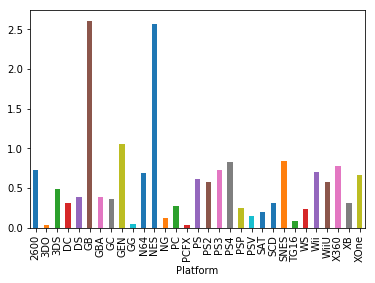

In [27]:
df.groupby('Platform')['Global_Sales'].mean().plot(kind='bar');

In [11]:
df['Publisher'].value_counts()

Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Eidos Interactive                          198
Midway Games                               198
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Enter

In [8]:
a=df[(df['Year'] == 2016)]
a['Genre'].value_counts()

Action          119
Role-Playing     40
Sports           38
Adventure        34
Shooter          32
Racing           20
Misc             18
Fighting         14
Strategy         10
Platform         10
Simulation        9
Name: Genre, dtype: int64

In [9]:
b=df[(df['Year'] == 2016)]
b['Platform'].value_counts()

PS4     107
PSV      60
XOne     54
PC       38
3DS      35
PS3      32
WiiU     10
X360      8
Name: Platform, dtype: int64

In [12]:
df['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [13]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [14]:
df['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [15]:
df.groupby('Year')['Global_Sales'].sum()

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    419.31
2005.0    459.94
2006.0    521.04
2007.0    611.13
2008.0    678.90
2009.0    667.30
2010.0    600.45
2011.0    515.99
2012.0    363.54
2013.0    368.11
2014.0    337.05
2015.0    264.44
2016.0     70.93
2017.0      0.05
2020.0      0.29
Name: Global_Sales, dtype: float64

In [18]:
a=df.groupby('Publisher')['Global_Sales'].sum()
a.sort_values(ascending=False)

Publisher
Nintendo                                  1786.56
Electronic Arts                           1110.32
Activision                                 727.46
Sony Computer Entertainment                607.50
Ubisoft                                    474.72
Take-Two Interactive                       399.54
THQ                                        340.77
Konami Digital Entertainment               283.64
Sega                                       272.99
Namco Bandai Games                         254.09
Microsoft Game Studios                     245.79
Capcom                                     200.89
Atari                                      157.22
Warner Bros. Interactive Entertainment     153.89
Square Enix                                145.18
Disney Interactive Studios                 119.96
Eidos Interactive                           98.98
LucasArts                                   87.34
Bethesda Softworks                          82.14
Midway Games                            

In [19]:
a=df.groupby('Publisher')['Global_Sales'].max()
a.sort_values(ascending=False)

Publisher
Nintendo                                  82.74
Microsoft Game Studios                    21.82
Take-Two Interactive                      21.40
Sony Computer Entertainment               14.98
Activision                                14.76
Ubisoft                                   10.26
Bethesda Softworks                         8.84
Electronic Arts                            8.49
Sega                                       8.06
SquareSoft                                 7.86
Atari                                      7.81
505 Games                                  6.81
Capcom                                     6.30
GT Interactive                             6.27
Konami Digital Entertainment               6.05
Sony Computer Entertainment Europe         5.99
Square Enix                                5.95
LucasArts                                  5.83
Virgin Interactive                         5.82
Warner Bros. Interactive Entertainment     5.53
Universal Interactive         

In [17]:
df.pivot_table(['NA_Sales', 'EU_Sales','JP_Sales'], ['Genre'], aggfunc='mean')

,EU_Sales,JP_Sales,NA_Sales
Genre,,,
Action,0.158323,0.048236,0.264726
Adventure,0.049868,0.040490,0.082271
Fighting,0.119481,0.103007,0.263667
Misc,0.124198,0.061967,0.235906
Platform,0.227573,0.147596,0.504571
Puzzle,0.087251,0.098471,0.212680
Racing,0.190865,0.045388,0.287766
Role-Playing,0.126384,0.236767,0.219946
Shooter,0.239137,0.029221,0.444733


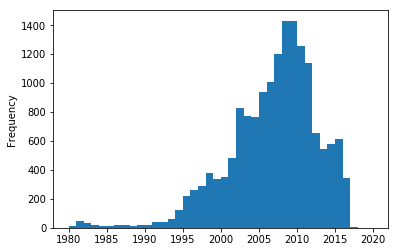

In [18]:
df['Year'].plot(kind='hist',bins=40);

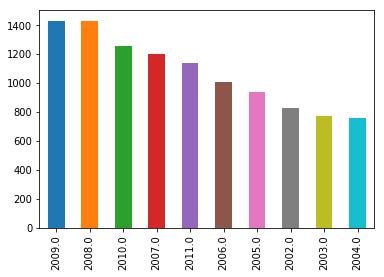

In [19]:
df['Year'].value_counts().head(10).plot(kind='bar');

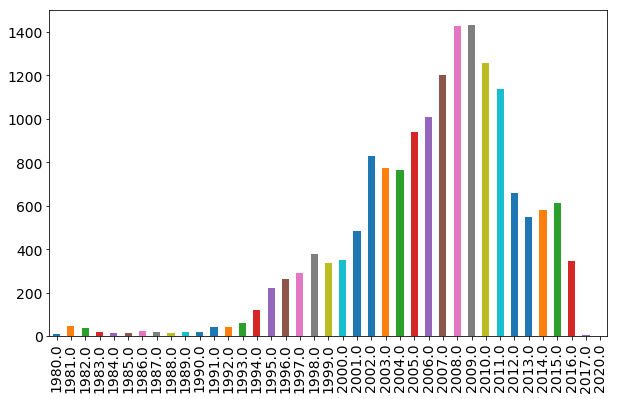

In [20]:
df['Year'].value_counts().sort_index().plot(kind='bar',figsize=(10, 6),fontsize=14);

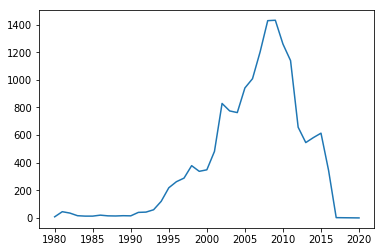

In [21]:
df['Year'].value_counts().sort_index().plot.line();

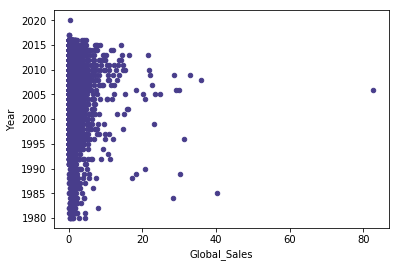

In [22]:
df.plot.scatter(x='Global_Sales', y='Year',color='darkslateblue');

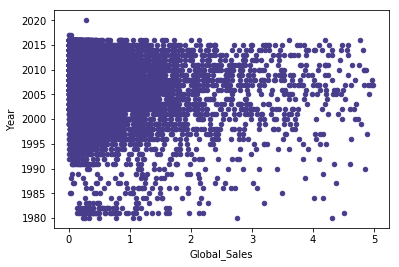

In [23]:
df[df['Global_Sales'] < 5].plot.scatter(x='Global_Sales', y='Year',color='darkslateblue');

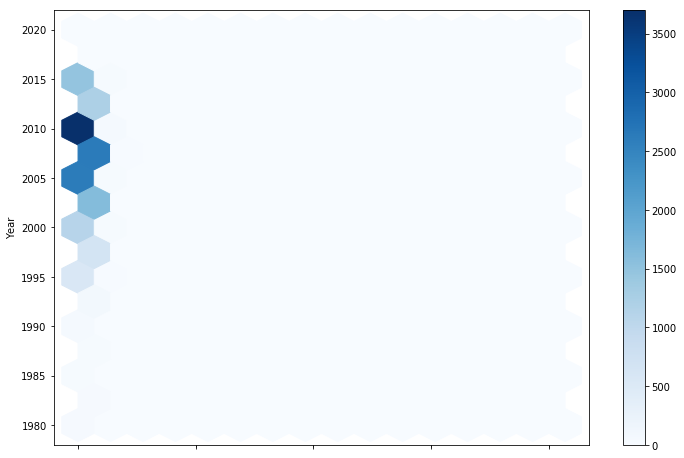

In [24]:
df.plot.hexbin(x='Global_Sales', y='Year',
                                            figsize=(12,8), 
                                            gridsize=15, 
                                            cmap=plt.cm.Blues
                                           );

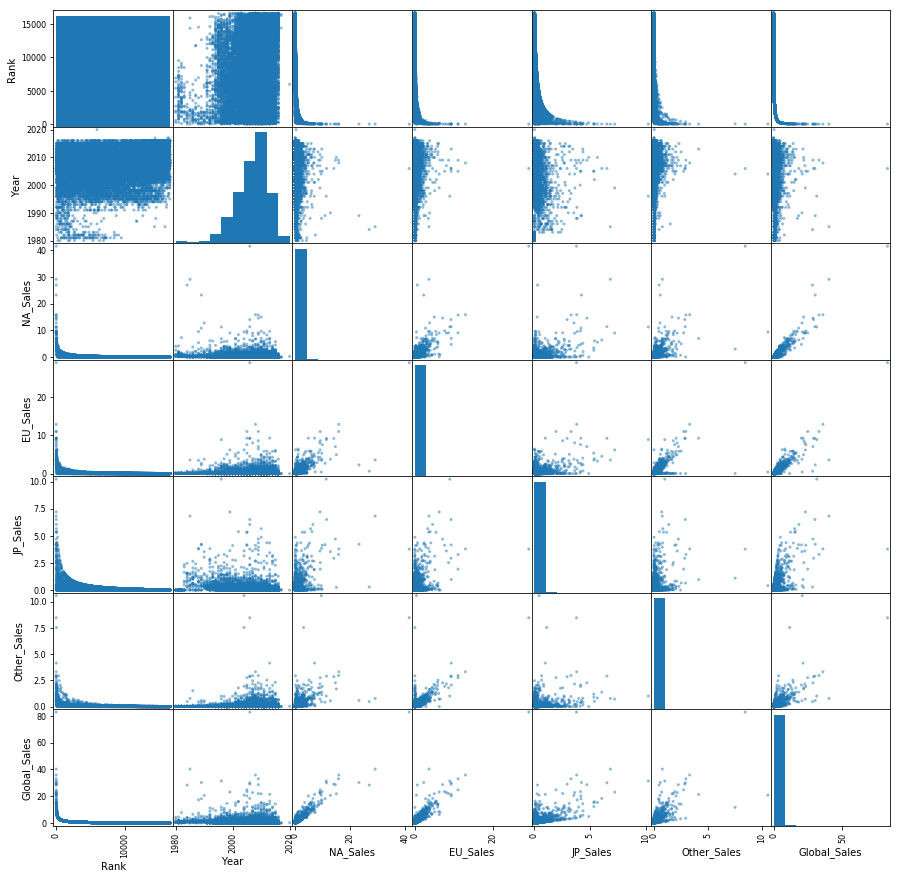

In [26]:
pd.plotting.scatter_matrix(df, 
                          figsize=(15, 15), 
                           diagonal='hist'
                          );

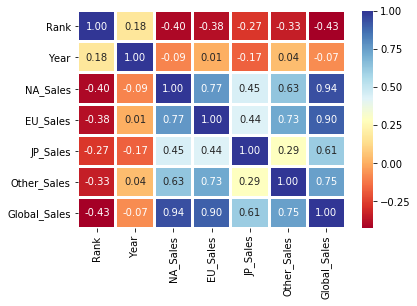

In [9]:
corr_matrix = df.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=2, cmap='RdYlBu');

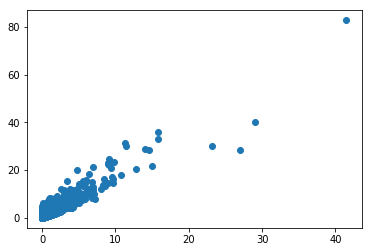

In [158]:
X = df[['NA_Sales']]
#X = np.asarray(df['NA_Sales'], dtype="double")
#X=X.astype('double')

y = df['Global_Sales']
#y = np.asarray(df['Global_Sales'], dtype="double")
#y=y.astype('double')
plt.plot(X, y, 'o');

In [65]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
y_pred = lr.predict(X_test)
y_pred

array([0.09379263, 0.63202309, 0.07643036, ..., 0.07643036, 0.16324173,
       0.19796627])

In [149]:
y_test.values

array([0.15, 0.4 , 0.02, ..., 0.02, 0.11, 0.09])

In [115]:
from sklearn.metrics import mean_squared_error

In [150]:
mean_squared_error(y_test, y_pred)

0.31646426418532747

In [151]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5625515658011516

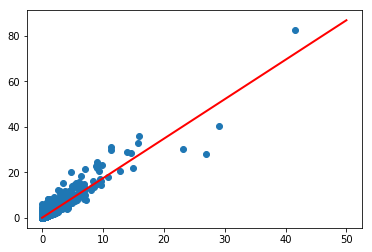

In [154]:
plt.plot(X, y, 'o')
plt.plot(range(0, 51), lr.coef_ * range(0, 51) + lr.intercept_, color='red', linewidth=2)
plt.show()

In [155]:
print ("y = {} + {}*X".format(lr.coef_[0], lr.intercept_))

y = 1.73622728441 + 0.0764303618123*X
